## Metric: Time Spent on Learning (Study Time/Week)

Data: Logs of online study time or self-reported time.

Insight: Classify students as **fast or slow learners** based on how long they take to complete material.

## info regarding each dataset
- 1. Student_performance_data _.csv: https://www.kaggle.com/datasets/aswanikrishnav/student-performance-dataset

- 4. student_performance_prediction.csv: https://www.kaggle.com/datasets/souradippal/student-performance-prediction

- 2 & 3. student-mat.csv & student-por.csv: https://archive.ics.uci.edu/dataset/320/student+performance


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE


data1 = pd.read_csv('datasets/Student_performance_data _.csv')
# data2 = pd.read_csv('datasets\student-mat.csv', delimiter=';', skipinitialspace=True)
# data3 = pd.read_csv('datasets\student-por.csv', delimiter=';', skipinitialspace=True)
# data4 = pd.read_csv('datasets\student_performance_prediction.csv')

print(data1.head())
# print(data2.head())
# print(data3.head())
# print(data4.head())
# print(data1.info())

   StudentID  Age  Gender  Ethnicity  ParentalEducation  StudyTimeWeekly  \
0       1001   17       1          0                  2        19.833723   
1       1002   18       0          0                  1        15.408756   
2       1003   15       0          2                  3         4.210570   
3       1004   17       1          0                  3        10.028829   
4       1005   17       1          0                  2         4.672495   

   Absences  Tutoring  ParentalSupport  Extracurricular  Sports  Music  \
0         7         1                2                0       0      1   
1         0         0                1                0       0      0   
2        26         0                2                0       0      0   
3        14         0                3                1       0      0   
4        17         1                3                0       0      0   

   Volunteering       GPA  GradeClass  
0             0  2.929196         2.0  
1             0  3

In [2]:
data1 = data1.dropna()
# data2 = data2.dropna()
# data3 = data3.dropna()
# data4 = data4.dropna()

## single dataset model

In [3]:
# check for rows where 'StudentID' is either null or 0 and where 'StudyTimeWeekly' is null
invalid_student_ids = data1[(data1['StudentID'].isnull()) | (data1['StudentID'] == 0)]
print(f'Rows with invalid "StudentID" (null or 0): {len(invalid_student_ids)}')

null_values = data1['StudyTimeWeekly'].isnull().sum()
print(f'Rows with null "StudyTimeWeekly" (null): {null_values}')

# show any 'StudentID' i
# if len(invalid_student_ids) > 0:
#     print(invalid_student_ids)

# drop invalid rows if needed
# data1 = data1[(data1['StudentID'].notnull()) & (data1['StudentID'] != 0)]

Rows with invalid "StudentID" (null or 0): 0
Rows with null "StudyTimeWeekly" (null): 0


In [4]:
data1['Learner_Type'] = data1['StudyTimeWeekly'].apply(lambda x: 0 if x < 8.5 else 1)
print(data1[['StudentID', 'StudyTimeWeekly', 'Learner_Type']].head())

   StudentID  StudyTimeWeekly  Learner_Type
0       1001        19.833723             1
1       1002        15.408756             1
2       1003         4.210570             0
3       1004        10.028829             1
4       1005         4.672495             0


In [5]:
data1

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass,Learner_Type
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0,1
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0,1
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0,0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0,1
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,3388,18,1,0,3,10.680555,2,0,4,1,0,0,0,3.455509,0.0,1
2388,3389,17,0,0,1,7.583217,4,1,4,0,1,0,0,3.279150,4.0,0
2389,3390,16,1,0,2,6.805500,20,0,2,0,0,0,1,1.142333,2.0,0
2390,3391,16,1,1,0,12.416653,17,0,2,0,1,1,0,1.803297,1.0,1


In [6]:
# features: X; target: y
X = data1[['Age', 'Gender', 'ParentalEducation', 'Absences', 
          'Tutoring', 'ParentalSupport', 'Extracurricular', 'GPA']]
y = data1['Learner_Type']


In [7]:
# split data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training set: {X_train.shape}, Test set: {X_test.shape}")

Training set: (1913, 8), Test set: (479, 8)


In [8]:
# train
model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)

# predict on test set
y_pred = model.predict(X_test)

In [9]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Model Accuracy: {accuracy * 100:.2f}%')

# Confusion matrix to see prediction breakdown
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

# 	               | pred fast (0)	pred slow (1)
#              ——— ——— ——— ——— ——— ——— ——— ——— ——— 
# actual fast (0)  | true neg (TN)	false pos (FP) 
# actual slow (1)  | false neg (FN)  true pos (TP) 

Model Accuracy: 76.41%
Confusion Matrix:
[[140  59]
 [ 54 226]]


In [ ]:
import pickle
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Load and preprocess data
data1 = pd.read_csv('datasets\Student_performance_data _.csv')
data1 = data1.dropna()
data1['Learner_Type'] = data1['StudyTimeWeekly'].apply(lambda x: 0 if x < 8.5 else 1)
X = data1[['Age', 'Gender', 'ParentalEducation', 'Absences', 
           'Tutoring', 'ParentalSupport', 'Extracurricular', 'GPA']]
y = data1['Learner_Type']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)
accuracy = accuracy_score(y_test, y_pred)
print(f'Model Accuracy: {accuracy * 100:.2f}%')

# Confusion matrix to see prediction breakdown
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

# Save the trained model to a pickle file
with open("learning_pace.pkl", "wb") as file:
    pickle.dump(model, file)

print("Model saved successfully.")


Model Accuracy: 76.41%
Confusion Matrix:
[[140  59]
 [ 54 226]]
Model saved successfully.


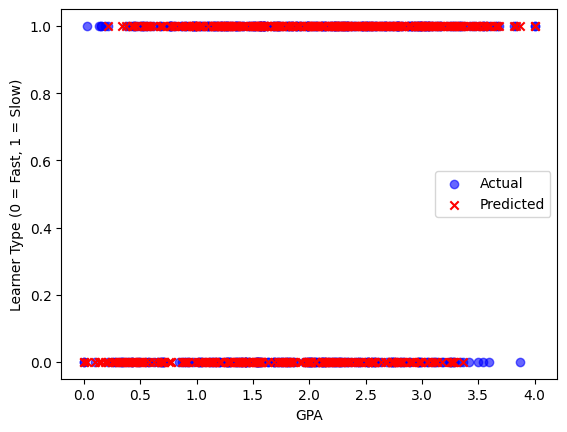

In [10]:
# scatter plot
plt.scatter(X_test['GPA'], y_test, label='Actual', color='blue', alpha=0.6)
plt.scatter(X_test['GPA'], y_pred, label='Predicted', color='red', marker='x')

plt.xlabel('GPA')
plt.ylabel('Learner Type (0 = Fast, 1 = Slow)')
plt.legend()
plt.show()

In [11]:
joblib.dump(model, 'time.pkl')

['time.pkl']

### example usage?

In [12]:
model = joblib.load('time.pkl')
print("Model loaded successfully!")

Model loaded successfully!


In [13]:
def get_student_data_by_id(student_id, dataset):
    """Retrieve student data by Student ID."""
    student_data = dataset[dataset['StudentID'] == int(student_id)]  # could vary on different dataset depending how each student is identified

    if student_data.empty:
        raise ValueError(f"Student ID {student_id} not found.")
    features = student_data[['Age', 'Gender', 'ParentalEducation', 'Absences',
                             'Tutoring', 'ParentalSupport', 'Extracurricular', 'GPA']]
    return features

def predict_learner_type(student_id, dataset, model):
    try:
        features = get_student_data_by_id(student_id, dataset)
        probability = model.predict_proba(features)[0][1]  
        prediction = model.predict(features)[0]  
        learner_type = 'Fast Learner' if prediction == 0 else 'Slow Learner'

        return f"{learner_type} (Probability of Slow Learner: {probability:.2f})"

    except ValueError as e:
        return str(e)

In [14]:
student_id = input("Please enter the Student ID: ") # input student id to get a prediction from model^
result = predict_learner_type(student_id, data1, model)
print(f"Student {student_id} is predicted to be a {result}.")

Student 1313 is predicted to be a Slow Learner (Probability of Slow Learner: 0.61).


## multi dataset model

In [15]:
# map 'studytime' to approximate weekly study hours, taking the median 
studytime_mapping = {1: 1, 2: 4, 3: 7.5, 4: 12}
data2['StudyTimeWeekly'] = data2['studytime'].map(studytime_mapping)
data3['StudyTimeWeekly'] = data3['studytime'].map(studytime_mapping)
data4 = data4.rename(columns={'weekly_self_study_hours': 'StudyTimeWeekly'})

print(data2[['studytime', 'StudyTimeWeekly']].head())
print(data4[['Study Hours per Week']].head())


   studytime  StudyTimeWeekly
0          2              4.0
1          2              4.0
2          2              4.0
3          3              7.5
4          2              4.0
   Study Hours per Week
1                   9.3
3                  17.6
4                   8.8
5                   8.8
6                  17.9


In [16]:
'''
    StudyTimeWeekly: hrs/week
    Absences: 
    GPA: out of 100
    ParentalEducation: 
    Extracurricular: yes/no
'''
data1_features = data1[['StudyTimeWeekly', 'Absences', 'GPA', 'Extracurricular']] # famsup: 0-4
data2_features = data2[['StudyTimeWeekly', 'absences', 'G3', 'activities']]
data3_features = data3[['StudyTimeWeekly', 'absences', 'G3', 'activities']]
data4_features = data4[['Study Hours per Week', 'Attendance Rate', 'Previous Grades', 'Participation in Extracurricular Activities']]

data2_features = data2_features.rename(columns={
    'absences': 'Absences', # 0 - 93
    'G3': 'GPA', # 0 - 20 
    'activities': 'Extracurricular'
})

data3_features = data3_features.rename(columns={
    'absences': 'Absences', # 0 - 93
    'G3': 'GPA', # 0 - 20 
    'activities': 'Extracurricular'
})

data4_features = data4_features.rename(columns={
    'Study Hours per Week': 'StudyTimeWeekly',
    'Attendance Rate': 'Absences', # get rid of the ones above 150, 0 - 100
    'Previous Grades': 'GPA', # get rid of the ones above 200, 0 - 100
    'Participation in Extracurricular Activities': 'Extracurricular' 
})

# data1: gpa(0-4), extracurricular(1:yes, 0:no)
# data2&3: gpa(0-20),
# data4: absences(0-100), gpa(0-100), parent?

print(data1_features.head())
print(data2_features.head())
print(data3_features.head())
print(data4_features.head())


   StudyTimeWeekly  Absences       GPA  Extracurricular
0        19.833723         7  2.929196                0
1        15.408756         0  3.042915                0
2         4.210570        26  0.112602                0
3        10.028829        14  2.054218                1
4         4.672495        17  1.288061                0
   StudyTimeWeekly  Absences  GPA Extracurricular
0              4.0         6    6              no
1              4.0         4    6              no
2              4.0        10   10              no
3              7.5         2   15             yes
4              4.0         4   10              no
   StudyTimeWeekly  Absences  GPA Extracurricular
0              4.0         4   11              no
1              4.0         2   11              no
2              4.0         6   12              no
3              7.5         0   14             yes
4              4.0         0   13              no
   StudyTimeWeekly  Absences   GPA Extracurricular
1            

In [17]:
data1_features['GPA'] = (data1_features['GPA'] / 4) * 100

# Modify Extracurricular column: change 1 to 'yes' and 0 to 'no'
data1_features['Extracurricular'] = data1_features['Extracurricular'].replace({1: 'yes', 0: 'no'})
print(data1_features.head())

   StudyTimeWeekly  Absences        GPA Extracurricular
0        19.833723         7  73.229890              no
1        15.408756         0  76.072871              no
2         4.210570        26   2.815056              no
3        10.028829        14  51.355453             yes
4         4.672495        17  32.201530              no


C:\Users\Wanyi Dai\AppData\Local\Temp\ipykernel_72668\642737750.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1_features['GPA'] = (data1_features['GPA'] / 4) * 100
C:\Users\Wanyi Dai\AppData\Local\Temp\ipykernel_72668\642737750.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1_features['Extracurricular'] = data1_features['Extracurricular'].replace({1: 'yes', 0: 'no'})


In [18]:
data2_features['GPA'] = (data2_features['GPA'] / 20) * 100
data3_features['GPA'] = (data3_features['GPA'] / 20) * 100
print(data2_features.head())
print(data3_features.head())

   StudyTimeWeekly  Absences   GPA Extracurricular
0              4.0         6  30.0              no
1              4.0         4  30.0              no
2              4.0        10  50.0              no
3              7.5         2  75.0             yes
4              4.0         4  50.0              no
   StudyTimeWeekly  Absences   GPA Extracurricular
0              4.0         4  55.0              no
1              4.0         2  55.0              no
2              4.0         6  60.0              no
3              7.5         0  70.0             yes
4              4.0         0  65.0              no


In [19]:
data4_features = data4_features[data4_features['Absences'] <= 100]
data4_features['Absences'] = 100 - data4_features['Absences']

# Step 2: Remove rows where 'GPA' values are above 200
data4_features = data4_features[data4_features['GPA'] <= 200]
data4_features['GPA'] = (data4_features['GPA'] / 200) * 100

print(data4_features.head())

   StudyTimeWeekly  Absences    GPA Extracurricular
1              9.3       4.7  30.30              No
3             17.6      23.2  31.20             Yes
4              8.8      10.7  36.35              No
5              8.8      26.2  34.65             Yes
6             17.9      61.4  46.80              No


In [20]:
print(data1_features.head())
print(data2_features.head())
print(data3_features.head())
print(data4_features.head())

   StudyTimeWeekly  Absences        GPA Extracurricular
0        19.833723         7  73.229890              no
1        15.408756         0  76.072871              no
2         4.210570        26   2.815056              no
3        10.028829        14  51.355453             yes
4         4.672495        17  32.201530              no
   StudyTimeWeekly  Absences   GPA Extracurricular
0              4.0         6  30.0              no
1              4.0         4  30.0              no
2              4.0        10  50.0              no
3              7.5         2  75.0             yes
4              4.0         4  50.0              no
   StudyTimeWeekly  Absences   GPA Extracurricular
0              4.0         4  55.0              no
1              4.0         2  55.0              no
2              4.0         6  60.0              no
3              7.5         0  70.0             yes
4              4.0         0  65.0              no
   StudyTimeWeekly  Absences    GPA Extracurricular


In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [22]:
# Convert Extracurricular to binary format (0 = No, 1 = Yes)
data1_features['Extracurricular'] = data1_features['Extracurricular'].map({'no': 0, 'yes': 1})
data2_features['Extracurricular'] = data2_features['Extracurricular'].map({'no': 0, 'yes': 1})
data3_features['Extracurricular'] = data3_features['Extracurricular'].map({'no': 0, 'yes': 1})
data4_features['Extracurricular'] = data4_features['Extracurricular'].map({'No': 0, 'Yes': 1})


C:\Users\Wanyi Dai\AppData\Local\Temp\ipykernel_72668\3829353914.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1_features['Extracurricular'] = data1_features['Extracurricular'].map({'no': 0, 'yes': 1})


In [23]:
combined_data = pd.concat([data1_features, data2_features, data3_features, data4_features], ignore_index=True)

# Handle missing values by filling with column median
combined_data.fillna(combined_data.median(), inplace=True)

# Display the combined data for verification
print(combined_data.head(50))

    StudyTimeWeekly  Absences         GPA  Extracurricular
0         19.833723       7.0   73.229890                0
1         15.408756       0.0   76.072871                0
2          4.210570      26.0    2.815056                0
3         10.028829      14.0   51.355453                1
4          4.672495      17.0   32.201530                0
5          8.191219       0.0   77.104590                1
6         15.601680      10.0   68.705935                0
7         15.424496      22.0   34.003568                1
8          4.562008       1.0   72.420480                0
9         18.444466       0.0   89.336855                1
10        11.851364      11.0   53.679291                0
11         7.598486      15.0   38.989863                0
12        10.038712      21.0   38.001945                1
13        12.101425      21.0   43.789524                0
14        11.197811       9.0   59.919703                0
15         9.728101      17.0   33.538018               

In [24]:
combined_data

,StudyTimeWeekly,Absences,GPA,Extracurricular
0,19.833723,7.0,73.229890,0
1,15.408756,0.0,76.072871,0
2,4.210570,26.0,2.815056,0
3,10.028829,14.0,51.355453,1
4,4.672495,17.0,32.201530,0
...,...,...,...,...
29663,5.100000,7.9,23.050000,1
29664,15.600000,6.2,25.700000,1
29665,11.300000,33.6,32.100000,0
29666,13.100000,34.4,19.050000,0


In [25]:
combined_data['Learner_Type'] = combined_data['StudyTimeWeekly'].apply(lambda x: 0 if x < 8.5 else 1)

# Step 3: Split the data into training and testing sets
X = combined_data[['Absences', 'GPA', 'Extracurricular']]
y = combined_data['Learner_Type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
combined_data = combined_data.drop_duplicates()
combined_data

,StudyTimeWeekly,Absences,GPA,Extracurricular,Learner_Type
0,19.833723,7.0,73.229890,0,1
1,15.408756,0.0,76.072871,0,1
2,4.210570,26.0,2.815056,0,0
3,10.028829,14.0,51.355453,1,1
4,4.672495,17.0,32.201530,0,0
...,...,...,...,...,...
29663,5.100000,7.9,23.050000,1,0
29664,15.600000,6.2,25.700000,1,1
29665,11.300000,33.6,32.100000,0,1
29666,13.100000,34.4,19.050000,0,1


In [27]:
model = RandomForestClassifier(n_estimators=50, max_depth=5, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("Classification Report:")
print(classification_report(y_test, y_pred))

Model Accuracy: 62.34%
Confusion Matrix:
[[ 240 2164]
 [  71 3459]]
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.10      0.18      2404
           1       0.62      0.98      0.76      3530

    accuracy                           0.62      5934
   macro avg       0.69      0.54      0.47      5934
weighted avg       0.68      0.62      0.52      5934



## test?


In [28]:
combined_data = combined_data.drop(columns=['Learner_Type'])
combined_data

,StudyTimeWeekly,Absences,GPA,Extracurricular
0,19.833723,7.0,73.229890,0
1,15.408756,0.0,76.072871,0
2,4.210570,26.0,2.815056,0
3,10.028829,14.0,51.355453,1
4,4.672495,17.0,32.201530,0
...,...,...,...,...
29663,5.100000,7.9,23.050000,1
29664,15.600000,6.2,25.700000,1
29665,11.300000,33.6,32.100000,0
29666,13.100000,34.4,19.050000,0


In [29]:
# Check for missing values
print(combined_data.isnull().sum())
combined_data = combined_data[combined_data['GPA'] <= 100]
combined_data = combined_data[combined_data['StudyTimeWeekly'] >= 0]

# Option 1: Drop rows with missing values
combined_data = combined_data.dropna()

# Option 2: Impute missing values (if applicable)
# For numerical columns, you could use mean or median imputation
# combined_data['GPA'].fillna(combined_data['GPA'].mean(), inplace=True)


StudyTimeWeekly    0
Absences           0
GPA                0
Extracurricular    0
dtype: int64


In [30]:
gpa_high = np.percentile(combined_data['GPA'], 75)
study_time_high = np.percentile(combined_data['StudyTimeWeekly'], 75)
absences_low = np.percentile(combined_data['Absences'], 25)
gpa_low = np.percentile(combined_data['GPA'], 25)
study_time_low = np.percentile(combined_data['StudyTimeWeekly'], 25)
absences_high = np.percentile(combined_data['Absences'], 75)
pa_medium_to_high = (combined_data['GPA'] >= gpa_low) & (combined_data['GPA'] <= gpa_high)
study_time_medium_to_high = (combined_data['StudyTimeWeekly'] >= study_time_low) & (combined_data['StudyTimeWeekly'] <= study_time_high)


conditions = [
    # High Achiever: (High GPA & High Study Time & Low Absences) OR (High GPA & High Study Time)
    ((combined_data['GPA'] >= gpa_high) & 
     (combined_data['StudyTimeWeekly'] >= study_time_high) & 
     (combined_data['Absences'] <= absences_low)) |
    ((combined_data['GPA'] >= gpa_high) & 
     (combined_data['StudyTimeWeekly'] >= study_time_high)) |
    ((combined_data['GPA'] >= gpa_high) & 
     (combined_data['StudyTimeWeekly'] <= study_time_low)),
    
    # Uncommitted Learner: (Low GPA & Low Study Time & High Absences) OR (Low GPA & Low Study Time)
    ((combined_data['GPA'] <= gpa_low) & 
     (combined_data['StudyTimeWeekly'] <= study_time_low) & 
     (combined_data['Absences'] >= absences_high)) |
    ((combined_data['GPA'] <= gpa_low) & 
     (combined_data['StudyTimeWeekly'] <= study_time_low)),
    
    # Irregular Learner: (High Absences & Low Study Time & High GPA) OR (High Study Time & Low Absences & Low GPA)
    ((combined_data['Absences'] >= absences_high) & 
     (combined_data['StudyTimeWeekly'] <= study_time_low) & 
     (combined_data['GPA'] >= gpa_high)) |
    ((combined_data['StudyTimeWeekly'] >= study_time_high) & 
     (combined_data['Absences'] <= absences_low) & 
     (combined_data['GPA'] <= gpa_low)),
    
    # Balanced Learner: (Medium GPA & Medium Study Time & Low Absences) OR (Medium GPA & Medium Study Time)
    ((combined_data['GPA'] > gpa_low) & (combined_data['GPA'] < gpa_high) &
     (combined_data['StudyTimeWeekly'] > study_time_low) & (combined_data['StudyTimeWeekly'] < study_time_high) &
     (combined_data['Absences'] <= absences_low)) |
    ((combined_data['GPA'] > gpa_low) & (combined_data['GPA'] < gpa_high) &
     (combined_data['StudyTimeWeekly'] > study_time_low) & (combined_data['StudyTimeWeekly'] < study_time_high))
]

'''
High Achiever: GPA 较高, 学习时间较多, 缺勤次数较少
Uncommitted Learner: GPA 较低, 学习时间较少, 缺勤次数较多
Irregular Learner: 缺勤次数较多
Balanced Learner: 任何不符合以上条件的学生会被默认成这类
'''
choices = ['High Achiever', 'Uncommitted Learner', 'Irregular Learner', 'Balanced Learner']
combined_data['LearnerType'] = np.select(conditions, choices, default='Other')

In [31]:
X = combined_data[['StudyTimeWeekly', 'GPA']]  # testing w/o 'Absences'
y = combined_data['LearnerType']

X = X.fillna(X.median())
scaler = StandardScaler()
X[['StudyTimeWeekly', 'GPA']] = scaler.fit_transform(X[['StudyTimeWeekly', 'GPA']])

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42, stratify=y_res)

model = RandomForestClassifier(
    random_state=42,
    n_estimators=100,
    max_depth=10,  
    class_weight="balanced"  
)
model.fit(X_train, y_train)
# valuate model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Print accuracy
print(f"Accuracy: {accuracy:.2f}")
print("confusion mtx:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.98
confusion mtx:
 [[3049    0    0    0    0]
 [   0 3048    0    0    0]
 [   0    0 3049    0    0]
 [   0    0  263 2786    0]
 [   0    0    0    0 3049]]


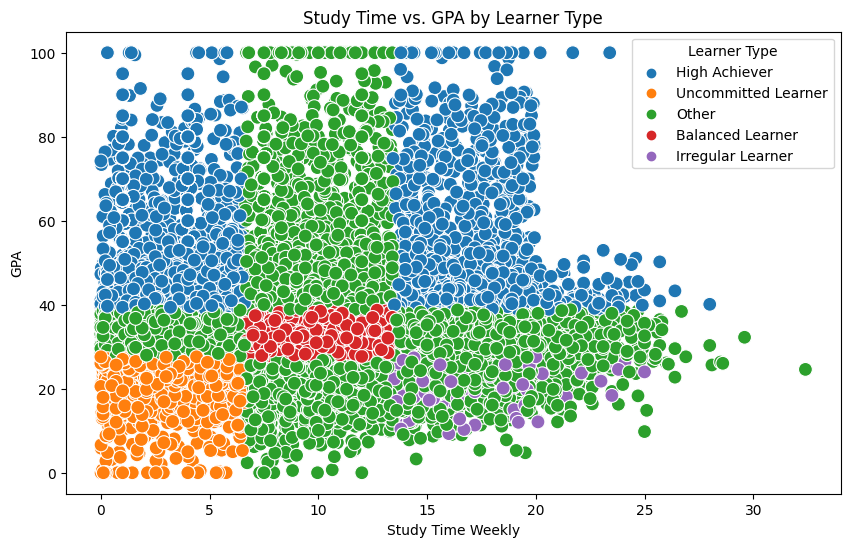

In [33]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=combined_data, x='StudyTimeWeekly', y='GPA', hue='LearnerType', s=100)
plt.title('Study Time vs. GPA by Learner Type')
plt.xlabel('Study Time Weekly')
plt.ylabel('GPA')
plt.legend(title='Learner Type')
plt.show()